In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_processed_filled.csv')

#columns2drop = ['Unnamed: 0', 'track_id', 'artist_id']
columns2drop = ['Unnamed: 0', 'track_id', 'artist_id','track_date_recorded_daytime','album_date_released_daytime']

tracks.drop(columns2drop, inplace=True, axis=1)

tracks.shape

(106486, 38)

In [6]:
class_name = 'Attribution-NonCommercial-ShareAlike 3.0 International'

attributes = [col for col in tracks.columns if col != class_name]

X = tracks[attributes].values
y = tracks[class_name]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [8]:
#different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '.'}]

training: constant learning-rate
Training set score: 0.856695
Training set loss: 51019816023.422600
training: constant with momentum
Training set score: 0.856695
Training set loss: 5046072138284.893555
training: inv-scaling learning-rate
Training set score: 0.856695
Training set loss: 18420340619177.351562
training: inv-scaling with momentum
Training set score: 0.856695
Training set loss: 0.410411


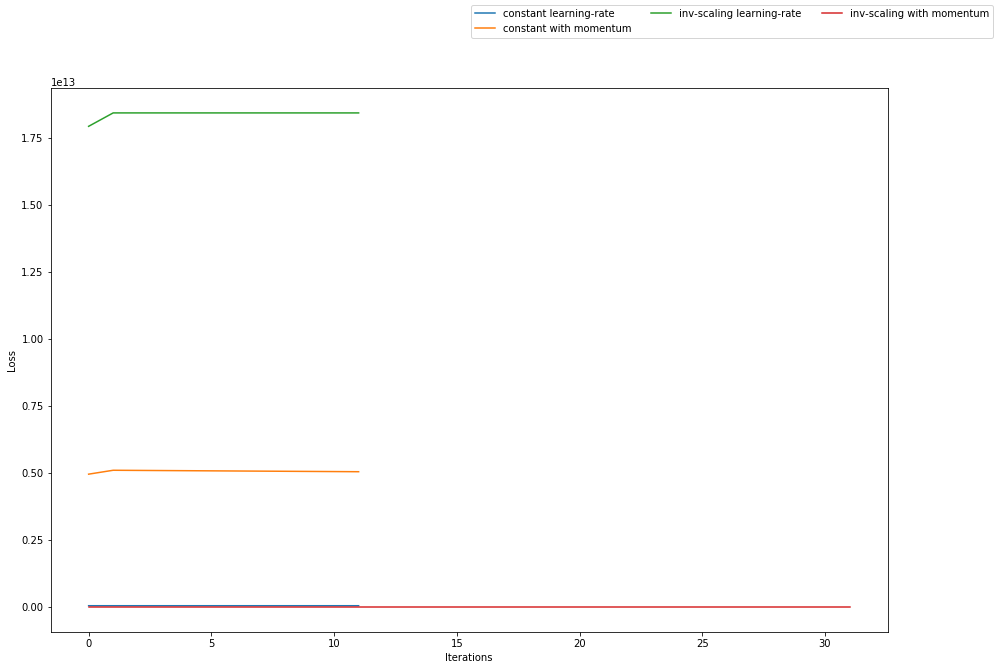

In [10]:
import warnings
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
        

fig, axes = plt.subplots(1, 1, figsize=(15, 10))      
mlps=[]   
for label, param in zip(labels, params):
    print("training: %s" % label)
    mlp = MLPClassifier(random_state=0,
                           max_iter=200, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
        mlp.fit(X, y)

    mlps.append(mlp)
    print("Training set score: %f" % mlp.score(X, y))
    print("Training set loss: %f" % mlp.loss_)
    
for mlp, label, args in zip(mlps, labels, plot_args):
    axes.plot(mlp.loss_curve_, label=label)
        
        
        
axes.set_ylabel("Loss")
axes.set_xlabel("Iterations")
fig.legend(axes.get_lines(), labels, ncol=3, loc=1)
plt.show()

Accuracy 0.8566956739497903
F1-score [0.92281755 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27368
           1       0.00      0.00      0.00      4578

    accuracy                           0.86     31946
   macro avg       0.43      0.50      0.46     31946
weighted avg       0.73      0.86      0.79     31946

Training loss 0.34632777301567913


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation loss 0.3437184801689621


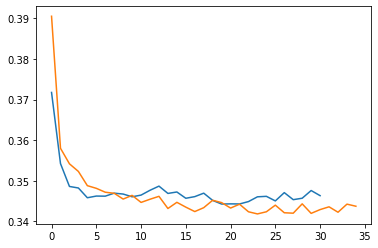

In [11]:
clf = MLPClassifier(random_state=0,solver= 'adam', learning_rate= 'constant',activation='logistic', momentum= .9, hidden_layer_sizes=(3),
           nesterovs_momentum= True, learning_rate_init= 0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_log_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
plt.plot(clf.loss_curve_)
print('Training loss '+str(clf.loss_))
clf.fit(X_val, y_val)
print('Validation loss '+str(clf.loss_))
plt.plot(clf.loss_curve_)
plt.show()

In [12]:
clf = MLPClassifier(random_state=0,solver= 'adam', learning_rate= 'invscaling',activation='logistic', momentum= .9, hidden_layer_sizes=(3),
           nesterovs_momentum= True, learning_rate_init= 0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_log_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print('Training loss '+str(clf.loss_))
clf.fit(X_val, y_val)
print('Validation loss '+str(clf.loss_))

Accuracy 0.8566956739497903
F1-score [0.92281755 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27368
           1       0.00      0.00      0.00      4578

    accuracy                           0.86     31946
   macro avg       0.43      0.50      0.46     31946
weighted avg       0.73      0.86      0.79     31946

Training loss 0.34632777301567913


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation loss 0.3437184801689621


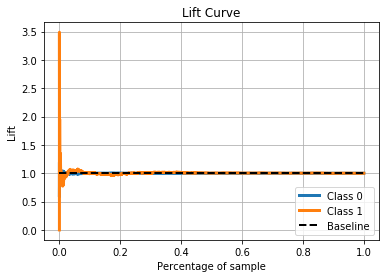

In [14]:
from scikitplot.metrics import plot_lift_curve
plot_lift_curve(y_test, y_score)
plt.show()

In [15]:
clf = MLPClassifier(random_state=0,solver= 'sgd', learning_rate= 'adaptive', activation='logistic', momentum= .9, hidden_layer_sizes=(3),
           nesterovs_momentum= True, learning_rate_init= 0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_log_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print('Training loss '+str(clf.loss_))
clf.fit(X_val, y_val)
print('Validation loss '+str(clf.loss_))

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision an

Accuracy 0.8566956739497903
F1-score [0.92281755 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27368
           1       0.00      0.00      0.00      4578

    accuracy                           0.86     31946
   macro avg       0.43      0.50      0.46     31946
weighted avg       0.73      0.86      0.79     31946

Training loss 0.2999873612281583
Validation loss 0.3107772245880072


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
clf = MLPClassifier(hidden_layer_sizes=(7, 5, 3), alpha=0.1, learning_rate='invscaling', 
                    activation='tanh', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = y_pred
y_score1 = clf.predict_log_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print('Training loss '+str(clf.loss_))
clf.fit(X_val, y_val)
print('Validation loss '+str(clf.loss_))

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision an

Accuracy 0.14330432605020973
F1-score [0.         0.25068448]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27368
           1       0.14      1.00      0.25      4578

    accuracy                           0.14     31946
   macro avg       0.07      0.50      0.13     31946
weighted avg       0.02      0.14      0.04     31946

Training loss 0.2807802300832459
Validation loss 0.2850504494883982


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [18]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(7, input_dim=n_feature, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [19]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=10).history

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 85188 samples, validate on 21298 samples
Epoch 1/50
85188/85188 [==============================] - 11s 125us/step - loss: 0.3510 - accuracy: 0.8611 - val_loss: 0.3263 - val_accuracy: 0.8647
Epoch 2/50
85188/85188 [==============================] - 10s 117us/step - loss: 0.3180 - accuracy: 0.8676 - val_loss: 0.3118 - val_accuracy: 0.8698
Epoch 3/50
85188/85188 [==============================] - 10s 116us/step - loss: 0.3065 - accuracy: 0.8736 - val_loss: 0.3071 - val_accuracy: 0.8749
Epoch 4/50
85188/85188 [==============================] - 10s 118us/step - loss: 0.2999 - accuracy: 0.8787 - val_loss: 0.2981 - val_accuracy: 0.8781
Epoch 5/50
85188/85188 [==============================] - 11s 125us/step - loss: 0.2958 - accuracy: 0.8813 - val_loss: 0.2955 - val_accuracy: 0.8812
Epoch 6/50
85188/85188 [==============================] - 10s 120us/step - loss: 0.2928 - accuracy: 0.8832 - v

In [20]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=50, batch_size=50).history

Train on 85188 samples, validate on 21298 samples
Epoch 1/50
85188/85188 [==============================] - 3s 35us/step - loss: 0.3745 - accuracy: 0.8562 - val_loss: 0.3429 - val_accuracy: 0.8567
Epoch 2/50
85188/85188 [==============================] - 2s 26us/step - loss: 0.3346 - accuracy: 0.8567 - val_loss: 0.3288 - val_accuracy: 0.8567
Epoch 3/50
85188/85188 [==============================] - 2s 28us/step - loss: 0.3228 - accuracy: 0.8607 - val_loss: 0.3189 - val_accuracy: 0.8637
Epoch 4/50
85188/85188 [==============================] - 2s 28us/step - loss: 0.3135 - accuracy: 0.8685 - val_loss: 0.3111 - val_accuracy: 0.8692
Epoch 5/50
85188/85188 [==============================] - 2s 27us/step - loss: 0.3079 - accuracy: 0.8717 - val_loss: 0.3067 - val_accuracy: 0.8737
Epoch 6/50
85188/85188 [==============================] - 2s 27us/step - loss: 0.3041 - accuracy: 0.8748 - val_loss: 0.3029 - val_accuracy: 0.8741
Epoch 7/50
85188/85188 [==============================] - 2s 28us/st

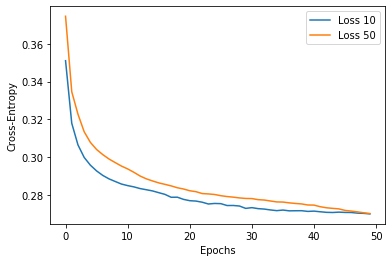

In [21]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [22]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

31946/31946 [==============================] - 0s 15us/step
Loss 741.128262, Accuracy 0.143304
Loss 1.228835, Accuracy 0.143304


In [23]:
y_pred = model2.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8566956739497903
F1-score [0.92281755 0.        ]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     27368
           1       0.00      0.00      0.00      4578

    accuracy                           0.86     31946
   macro avg       0.43      0.50      0.46     31946
weighted avg       0.73      0.86      0.79     31946



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


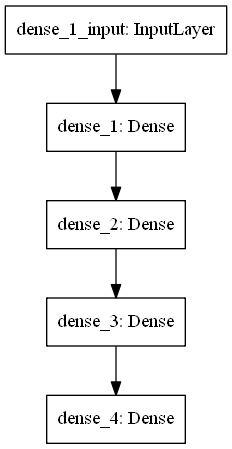

In [24]:
import pydot
from keras.utils import plot_model
plot_model(model1)

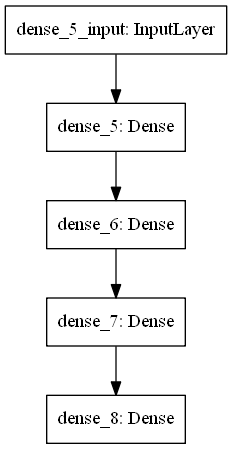

In [25]:
plot_model(model2)

In [26]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=10).history

Train on 85188 samples, validate on 21298 samples
Epoch 1/100
85188/85188 [==============================] - 11s 132us/step - loss: 0.3533 - accuracy: 0.8597 - val_loss: 0.3298 - val_accuracy: 0.8654
Epoch 2/100
85188/85188 [==============================] - 11s 128us/step - loss: 0.3190 - accuracy: 0.8709 - val_loss: 0.3156 - val_accuracy: 0.8733
Epoch 3/100
85188/85188 [==============================] - 11s 129us/step - loss: 0.3112 - accuracy: 0.8736 - val_loss: 0.3107 - val_accuracy: 0.8731
Epoch 4/100
85188/85188 [==============================] - 11s 129us/step - loss: 0.3071 - accuracy: 0.8749 - val_loss: 0.3073 - val_accuracy: 0.8747
Epoch 5/100
85188/85188 [==============================] - 11s 125us/step - loss: 0.3037 - accuracy: 0.8748 - val_loss: 0.3049 - val_accuracy: 0.8732
Epoch 6/100
85188/85188 [==============================] - 11s 130us/step - loss: 0.3013 - accuracy: 0.8757 - val_loss: 0.3038 - val_accuracy: 0.8752
Epoch 7/100
85188/85188 [=========================

In [27]:
print('Train: Loss %f, Accuracy %f' % (history1['loss'][49], history1['accuracy'][49]))
print('Val: Loss %f, Accuracy %f' % (history1['val_loss'][49], history1['val_accuracy'][49]))

Train: Loss 0.270099, Accuracy 0.895185
Val: Loss 0.270726, Accuracy 0.895248


In [28]:
print('Train: Loss %f, Accuracy %f' % (history2['loss'][49], history2['accuracy'][49]))
print('Val: Loss %f, Accuracy %f' % (history2['val_loss'][49], history2['val_accuracy'][49]))

Train: Loss 0.270298, Accuracy 0.885899
Val: Loss 0.272789, Accuracy 0.885388


In [29]:
print('Train: Loss %f, Accuracy %f' % (history3['loss'][99], history3['accuracy'][99]))
print('Val: Loss %f, Accuracy %f' % (history3['val_loss'][99], history3['val_accuracy'][99]))

Train: Loss 0.259463, Accuracy 0.884326
Val: Loss 0.261829, Accuracy 0.884121


31946/31946 [==============================] - 0s 16us/step
Loss 741.128262, Accuracy 0.143304
Loss 1.228835, Accuracy 0.143304
Loss 805.976948, Accuracy 0.143304


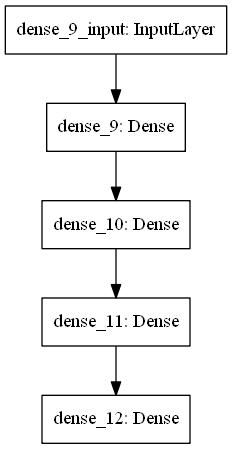

In [30]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
plot_model(model3)

In [31]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

31946/31946 [==============================] - 1s 16us/step


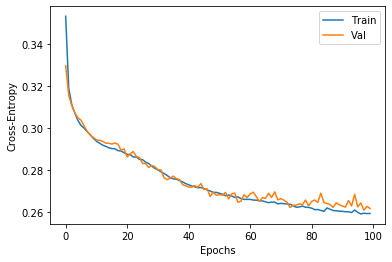

In [32]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [33]:
scores = cross_val_score(model3, X_train, y_train, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(model3, X_train, y_train, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x0000015326561288> does not.

In [ ]:
from ann_visualizer.visualize import ann_viz;
#Build your model here
ann_viz(model3,view=True, filename="net.gv")

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, 
                      batch_size=10, callbacks=[es,mc]).history

In [ ]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

In [ ]:
from keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    model.add(Dense(7, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(3, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, 
                    batch_size=10, callbacks=[es,mc]).history

In [ ]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(7, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              epochs=1000, batch_size=10, callbacks=[es,mc]).history

In [ ]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

In [ ]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))